In [1]:
import pandas as pd

In [4]:
pd.set_option('max_columns', None)
pokemon = pd.read_csv("data/pokemon.csv")
pokemon.head(3)

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,5120,70,318,45,Seed Pokémon,49,1059860,0.7,45,Fushigidaneフシギダネ,Bulbasaur,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,5120,70,405,45,Seed Pokémon,63,1059860,1.0,60,Fushigisouフシギソウ,Ivysaur,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,5120,70,625,45,Seed Pokémon,123,1059860,2.0,80,Fushigibanaフシギバナ,Venusaur,88.1,3,122,120,80,grass,poison,100.0,1,0


## The frequency of Pokemon by type:
Absolut numbers

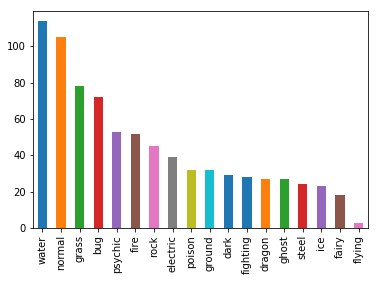

In [24]:
pokemon['type1'].value_counts().plot.bar()

Relative proportions

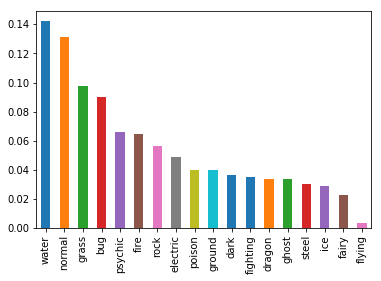

In [23]:
(pokemon['type1'].value_counts() / len(pokemon)).plot.bar()

The frequency of Pokemon by HP stat total:

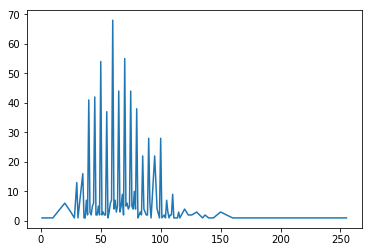

In [21]:
pokemon['hp'].value_counts().sort_index().plot.line()

The frequency of Pokemon by weight:

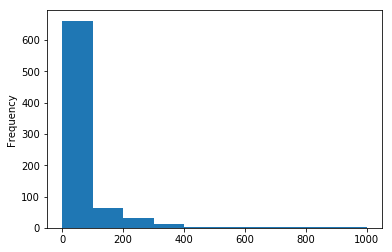

In [25]:
pokemon['weight_kg'].plot.hist()

Scatter plotting attack and defence

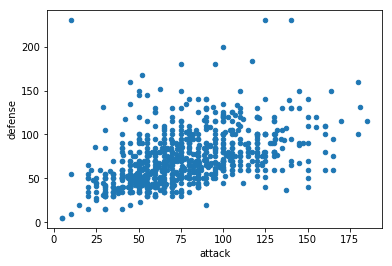

In [34]:
pokemon.plot.scatter(x='attack', y='defense')

Hex plot attack and defense

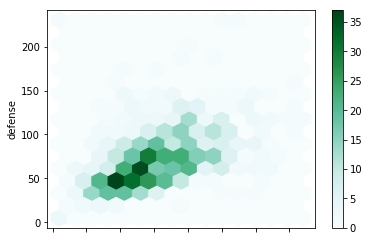

In [63]:
pokemon.plot.hexbin(x='attack', y='defense', gridsize=15)

Finding name of the pokemon that has defense over 200 but attack lower than 25

In [40]:
pokemon[((pokemon.defense > 200) & (pokemon.attack < 25))].loc[:,['name','attack','defense']]

,name,attack,defense
212,Shuckle,10,230


Scatter plotting speed and weight

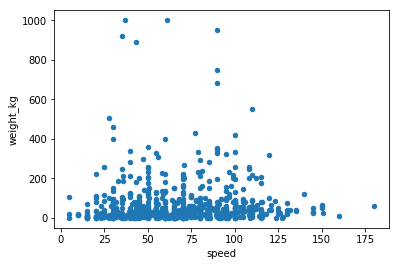

In [64]:
pokemon.plot.scatter(x='speed', y='weight_kg')

In [67]:
pokemon_stats_legendary = pokemon.groupby(['is_legendary', 'generation']).mean()[['attack', 'defense']]

In [68]:
pokemon_stats_legendary

attack     defense
is_legendary generation                        
0            1            73.486301   69.431507
             2            68.095745   70.042553
             3            74.080000   68.768000
             4            79.234043   72.382979
             5            77.608392   70.000000
             6            71.484848   71.136364
             7            80.238095   74.539683
1            1           105.000000   89.000000
             2            99.166667   99.166667
             3           116.000000  121.000000
             4           107.538462  103.538462
             5           113.000000   93.538462
             6           132.000000  100.166667
             7           100.941176   90.882353

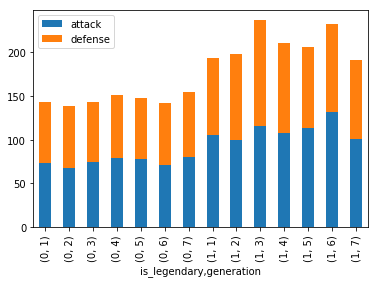

In [69]:
pokemon_stats_legendary.plot.bar(stacked=True)

In [72]:
pokemon_stats_by_generation = pokemon.groupby('generation').mean()[['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']]

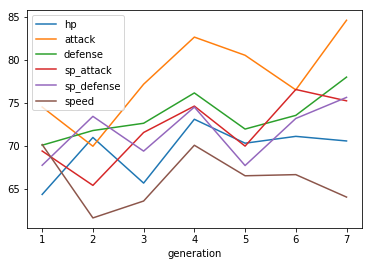

In [73]:
pokemon_stats_by_generation.plot.line()

Styling plots

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

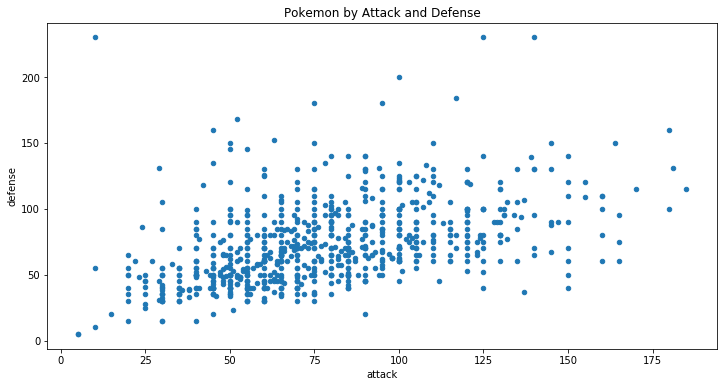

In [78]:
pokemon.plot.scatter(x='attack',y='defense', 
                     figsize=(12,6), 
                     title="Pokemon by Attack and Defense")

In [79]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
abilities            801 non-null object
against_bug          801 non-null float64
against_dark         801 non-null float64
against_dragon       801 non-null float64
against_electric     801 non-null float64
against_fairy        801 non-null float64
against_fight        801 non-null float64
against_fire         801 non-null float64
against_flying       801 non-null float64
against_ghost        801 non-null float64
against_grass        801 non-null float64
against_ground       801 non-null float64
against_ice          801 non-null float64
against_normal       801 non-null float64
against_poison       801 non-null float64
against_psychic      801 non-null float64
against_rock         801 non-null float64
against_steel        801 non-null float64
against_water        801 non-null float64
attack               801 non-null int64
base_egg_steps       801 non-null int64
base_happiness    

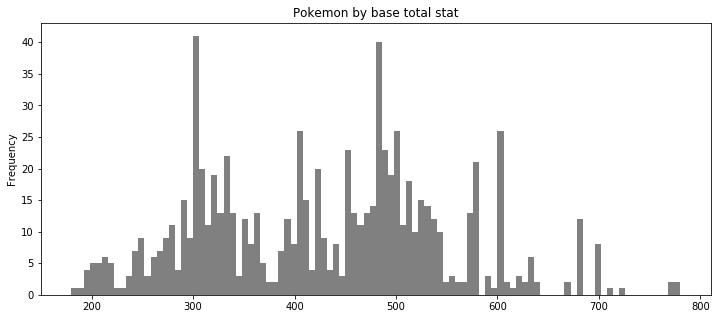

In [85]:
pokemon['base_total'].plot.hist(color='grey', 
                                figsize=(12,5), 
                                bins=100,
                                title='Pokemon by base total stat')

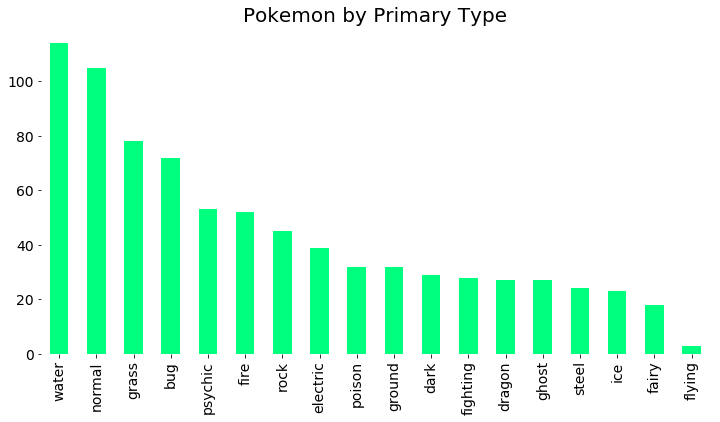

In [103]:
ax = pokemon['type1'].value_counts().plot.bar(
    figsize=(12,6),
    fontsize=14,
    color='springgreen')

ax.set_title("Pokemon by Primary Type", fontsize=20)
sns.despine(bottom=True, left=True)